# 单个分类

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 读取数据

In [2]:
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## 可视化数据

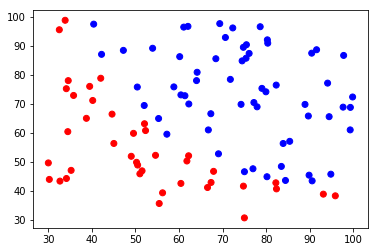

In [3]:
color = list(map(lambda x: 'red' if x == 0 else 'blue', data.admitted))
plt.scatter(data.exam1, data.exam2, c=color)

In [4]:
def get_X(df): 
    """Add bias unit to dataset and return as a whole"""
    ones = pd.DataFrame({'ones': np.ones(len(df))}) # add bias unit
    data = pd.concat([ones, df], axis=1)  # concatenate bias feature and other features
    return data.iloc[:, :-1].values  # this line of code returns ndarray, not matrix


def get_y(df):
    """Get predictions of the dataset, assume that the last column is the target"""  
    return np.array(df.iloc[:, -1]) # df.iloc[:, -1] means the last column of df


def normalize_feature(df):
    """Apply normalization to all columns"""
    return df.apply(lambda column: (column - column.mean()) / column.std()) # apply standard score 

In [5]:
X = get_X(data)
print(X.shape)

y = get_y(data)
print(y.shape)

(100, 3)
(100,)


## sigmoid 函数

g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

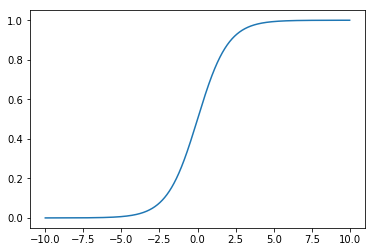

In [7]:
plt.plot(np.arange(-10, 10, step=0.01),
        sigmoid(np.arange(-10, 10, step=0.01)))

## cost function(代价函数)

$$\begin{align}
  & J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
\end{align}$$

In [8]:
def cost(theta, X, y):
    ''' cost fn is -l(theta) for you to minimize'''
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

In [9]:
theta = theta=np.zeros(3) # X(m*n) so theta is n*1
print(cost(theta, X, y))

0.6931471805599453


## gradient descent(梯度下降)
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [10]:
def gradient(theta, X, y):
    '''just 1 batch gradient'''
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [11]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

## 拟合参数

> * 这里使用 [`scipy.optimize.minimize`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) 去寻找参数  

In [12]:
import scipy.optimize as opt

In [13]:
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)

## 用训练集预测和验证

In [14]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [15]:
from sklearn.metrics import classification_report#这个包是评价报告

final_theta = res.x
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.85      0.86        40
          1       0.90      0.92      0.91        60

avg / total       0.89      0.89      0.89       100



### 可视化决策边界

绿色部分是预测为 1 的

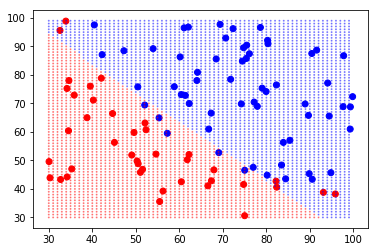

In [16]:
color = list(map(lambda x: 'red' if x == 0 else 'blue', data.admitted))
plt.scatter(data.exam1, data.exam2, c=color)

xx, yy = np.mgrid[30:100:1, 30:100:1]
xx, yy = xx.flatten(), yy.flatten()
df = pd.DataFrame({'bias': np.ones(xx.shape), 'exam1': xx, 'exam2': yy})

color = list(map(lambda x: 'blue' if  x== 1 else 'red', 
                 predict(df[['bias', 'exam1', 'exam2']].values, final_theta)))

plt.scatter(df.exam1, df.exam2, c=color, s=1, alpha=0.4)